 **Pavan Pyla**
 # Fraud Provider Detection In Health Care using several Classification Tecniques

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder , OrdinalEncoder , LabelEncoder
import tensorflow as tf
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.utils.class_weight import compute_class_weight

### Reading the data into Data Frame

In [3]:
Train=pd.read_csv(r"Train-1542865627584.csv")
Train_Beneficiarydata=pd.read_csv(r"Train_Beneficiarydata-1542865627584.csv")
Train_Inpatientdata=pd.read_csv(r"Train_Inpatientdata-1542865627584.csv")
Train_Outpatientdata=pd.read_csv(r"Train_Outpatientdata-1542865627584.csv")

In [4]:
Train

,Provider,PotentialFraud
0,PRV51001,No
1,PRV51003,Yes
2,PRV51004,No
3,PRV51005,Yes
4,PRV51007,No
...,...,...
5405,PRV57759,No
5406,PRV57760,No
5407,PRV57761,No
5408,PRV57762,No


In [4]:
Train_Beneficiarydata

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,...,2,2,2,2,2,2,0,0,30,50
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,...,2,2,1,2,2,2,0,0,90,40
3,BENE11004,1922-07-01,NaN,1,1,0,39,270,12,12,...,2,1,1,1,1,2,0,0,1810,760
4,BENE11005,1935-09-01,NaN,1,1,0,24,680,12,12,...,2,1,2,2,2,2,0,0,1790,1200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138551,BENE159194,1939-07-01,NaN,1,1,0,39,140,12,12,...,2,2,2,2,2,2,0,0,430,460
138552,BENE159195,1938-12-01,NaN,2,1,0,49,530,12,12,...,2,1,2,2,2,2,0,0,880,100
138553,BENE159196,1916-06-01,NaN,2,1,0,6,150,12,12,...,1,1,1,2,2,2,2000,1068,3240,1390
138554,BENE159197,1930-01-01,NaN,1,1,0,16,560,12,12,...,2,2,1,2,2,2,0,0,2650,10


In [5]:
Train_Inpatientdata

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40469,BENE159167,CLM69886,2009-09-28,2009-10-02,PRV53671,7000,PHY345332,PHY319565,NaN,2009-09-28,...,79092,70704,2869,4148,9904.0,NaN,NaN,NaN,NaN,NaN
40470,BENE159175,CLM74504,2009-11-03,2009-11-06,PRV54981,4000,PHY342806,PHY365497,NaN,2009-11-03,...,49122,4254,5990,NaN,8605.0,NaN,NaN,NaN,NaN,NaN
40471,BENE159177,CLM76485,2009-11-18,2009-11-22,PRV56588,3000,PHY423220,PHY332752,NaN,2009-11-18,...,71534,71590,V4502,NaN,9390.0,NaN,NaN,NaN,NaN,NaN
40472,BENE159177,CLM79949,2009-12-17,2009-12-18,PRV56575,5000,PHY353156,NaN,NaN,2009-12-17,...,4263,0414,41400,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
Train_Outpatientdata

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,71947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517732,BENE159198,CLM510792,2009-08-06,2009-08-06,PRV53699,800,PHY364188,PHY364188,PHY385752,2163,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
517733,BENE159198,CLM551294,2009-08-29,2009-08-29,PRV53702,400,PHY423019,PHY332284,NaN,07041,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
517734,BENE159198,CLM596444,2009-09-24,2009-09-24,PRV53676,60,PHY361063,NaN,NaN,V570,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
517735,BENE159198,CLM636992,2009-10-18,2009-10-18,PRV53689,70,PHY403198,NaN,PHY419379,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


### Merging OutPatient ,Inpatient and Beneficiary

In [6]:
Train_Allpatientdata=pd.merge(Train_Outpatientdata,Train_Inpatientdata,
                              left_on=['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode'],
                              right_on=['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode']
                              ,how='outer')

In [7]:
Train_Allpatientdata=pd.merge(Train_Allpatientdata,Train_Beneficiarydata,on="BeneID")

## Data Preprocessing

In [8]:
Train_Allpatientdata

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE100000,CLM126832,2009-01-08,2009-01-08,PRV57172,50,PHY383401,NaN,NaN,79678,...,2,2,1,2,2,2,0,0,120,30
1,BENE100000,CLM351838,2009-05-10,2009-05-10,PRV57172,70,PHY370909,NaN,PHY363377,71656,...,2,2,1,2,2,2,0,0,120,30
2,BENE100001,CLM229075,2009-03-05,2009-03-05,PRV55158,70,PHY383478,NaN,NaN,64881,...,2,2,1,1,2,1,0,0,2530,540
3,BENE100001,CLM258631,2009-03-21,2009-03-21,PRV54966,70,PHY347511,NaN,NaN,36401,...,2,2,1,1,2,1,0,0,2530,540
4,BENE100001,CLM332544,2009-04-30,2009-05-02,PRV54890,90,PHY343317,PHY408367,PHY408367,2948,...,2,2,1,1,2,1,0,0,2530,540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558206,BENE99999,CLM359214,2009-05-14,2009-05-14,PRV55826,80,PHY341548,NaN,NaN,V7282,...,2,1,1,1,2,2,0,0,1270,690
558207,BENE99999,CLM475422,2009-07-17,2009-07-17,PRV54670,80,PHY351000,NaN,NaN,V103,...,2,1,1,1,2,2,0,0,1270,690
558208,BENE99999,CLM591853,2009-09-21,2009-09-21,PRV57336,30,PHY422310,PHY363262,NaN,185,...,2,1,1,1,2,2,0,0,1270,690
558209,BENE99999,CLM712394,2009-12-03,2009-12-03,PRV51690,700,PHY379564,NaN,NaN,71690,...,2,1,1,1,2,2,0,0,1270,690


In [9]:
df=pd.merge(Train_Allpatientdata,Train,on='Provider')

In [10]:
df

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud
0,BENE100000,CLM126832,2009-01-08,2009-01-08,PRV57172,50,PHY383401,NaN,NaN,79678,...,2,1,2,2,2,0,0,120,30,Yes
1,BENE100000,CLM351838,2009-05-10,2009-05-10,PRV57172,70,PHY370909,NaN,PHY363377,71656,...,2,1,2,2,2,0,0,120,30,Yes
2,BENE100001,CLM229075,2009-03-05,2009-03-05,PRV55158,70,PHY383478,NaN,NaN,64881,...,2,1,1,2,1,0,0,2530,540,No
3,BENE100001,CLM258631,2009-03-21,2009-03-21,PRV54966,70,PHY347511,NaN,NaN,36401,...,2,1,1,2,1,0,0,2530,540,Yes
4,BENE100001,CLM332544,2009-04-30,2009-05-02,PRV54890,90,PHY343317,PHY408367,PHY408367,2948,...,2,1,1,2,1,0,0,2530,540,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558206,BENE99999,CLM359214,2009-05-14,2009-05-14,PRV55826,80,PHY341548,NaN,NaN,V7282,...,1,1,1,2,2,0,0,1270,690,No
558207,BENE99999,CLM475422,2009-07-17,2009-07-17,PRV54670,80,PHY351000,NaN,NaN,V103,...,1,1,1,2,2,0,0,1270,690,No
558208,BENE99999,CLM591853,2009-09-21,2009-09-21,PRV57336,30,PHY422310,PHY363262,NaN,185,...,1,1,1,2,2,0,0,1270,690,No
558209,BENE99999,CLM712394,2009-12-03,2009-12-03,PRV51690,700,PHY379564,NaN,NaN,71690,...,1,1,1,2,2,0,0,1270,690,No


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558211 entries, 0 to 558210
Data columns (total 55 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   BeneID                           558211 non-null  object 
 1   ClaimID                          558211 non-null  object 
 2   ClaimStartDt                     558211 non-null  object 
 3   ClaimEndDt                       558211 non-null  object 
 4   Provider                         558211 non-null  object 
 5   InscClaimAmtReimbursed           558211 non-null  int64  
 6   AttendingPhysician               556703 non-null  object 
 7   OperatingPhysician               114447 non-null  object 
 8   OtherPhysician                   199736 non-null  object 
 9   ClmDiagnosisCode_1               547758 non-null  object 
 10  ClmDiagnosisCode_2               362605 non-null  object 
 11  ClmDiagnosisCode_3               243055 non-null  object 
 12  Cl

In [13]:
df1=df

In [14]:
df1

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud
0,BENE100000,CLM126832,2009-01-08,2009-01-08,PRV57172,50,PHY383401,NaN,NaN,79678,...,2,1,2,2,2,0,0,120,30,Yes
1,BENE100000,CLM351838,2009-05-10,2009-05-10,PRV57172,70,PHY370909,NaN,PHY363377,71656,...,2,1,2,2,2,0,0,120,30,Yes
2,BENE100001,CLM229075,2009-03-05,2009-03-05,PRV55158,70,PHY383478,NaN,NaN,64881,...,2,1,1,2,1,0,0,2530,540,No
3,BENE100001,CLM258631,2009-03-21,2009-03-21,PRV54966,70,PHY347511,NaN,NaN,36401,...,2,1,1,2,1,0,0,2530,540,Yes
4,BENE100001,CLM332544,2009-04-30,2009-05-02,PRV54890,90,PHY343317,PHY408367,PHY408367,2948,...,2,1,1,2,1,0,0,2530,540,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558206,BENE99999,CLM359214,2009-05-14,2009-05-14,PRV55826,80,PHY341548,NaN,NaN,V7282,...,1,1,1,2,2,0,0,1270,690,No
558207,BENE99999,CLM475422,2009-07-17,2009-07-17,PRV54670,80,PHY351000,NaN,NaN,V103,...,1,1,1,2,2,0,0,1270,690,No
558208,BENE99999,CLM591853,2009-09-21,2009-09-21,PRV57336,30,PHY422310,PHY363262,NaN,185,...,1,1,1,2,2,0,0,1270,690,No
558209,BENE99999,CLM712394,2009-12-03,2009-12-03,PRV51690,700,PHY379564,NaN,NaN,71690,...,1,1,1,2,2,0,0,1270,690,No


In [15]:
import pandas as pd

# Assuming you already have the DataFrame 'df' containing the claims data

# Get unique provider values
unique_providers = df1['Provider'].unique()

# Create a DataFrame for provider mapping
provider_mapping_df = pd.DataFrame({'Provider_ID': range(1, len(unique_providers)+1),
                                    'Provider': unique_providers})

# Save the provider mapping DataFrame into a CSV file
provider_mapping_df.to_csv('provider_mapping.csv', index=False)


In [16]:
import pandas as pd

# Assuming you already have the DataFrame 'df1' containing the claims data

# Get unique attending physician values
unique_physicians = df1['AttendingPhysician'].unique()

# Create a DataFrame for physician mapping
physician_mapping_df = pd.DataFrame({'Physician_ID': range(1, len(unique_physicians)+1),
                                     'AttendingPhysician': unique_physicians})

# Save the physician mapping DataFrame into a CSV file
physician_mapping_df.to_csv('attennding_physician_mapping.csv', index=False)


In [17]:
import pandas as pd

# Assuming you already have the DataFrame 'df1' containing the claims data

# Get unique operating physician values
unique_operating_physicians = df1['OperatingPhysician'].dropna().unique()

# Create a DataFrame for operating physician mapping
operating_physician_mapping_df = pd.DataFrame({'OperatingPhysician_ID': range(1, len(unique_operating_physicians)+1),
                                               'OperatingPhysician': unique_operating_physicians})

# Save the operating physician mapping DataFrame into a CSV file
operating_physician_mapping_df.to_csv('operating_physician_mapping.csv', index=False)


In [18]:
import pandas as pd

# Assuming you already have the DataFrame 'df1' containing the claims data

# Columns containing diagnosis codes
diagnosis_code_columns = ['ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
                          'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
                          'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9']

# Columns containing physician names
physician_columns = ['AttendingPhysician', 'OperatingPhysician', 'OtherPhysician']

# Initialize an empty dictionary to store mappings
mappings = {}

# Iterate over the diagnosis code columns
for column in diagnosis_code_columns:
    # Get unique values for the current column
    unique_values = df1[column].dropna().unique()
    
    # Create a mapping DataFrame
    mapping_df = pd.DataFrame({f'{column}_ID': range(1, len(unique_values)+1),
                               column: unique_values})
    
    # Save the mapping DataFrame into a CSV file
    mapping_df.to_csv(f'{column}_mapping.csv', index=False)
    
    # Store the mapping DataFrame in the dictionary
    mappings[column] = mapping_df

# Iterate over the physician columns
for column in physician_columns:
    # Get unique values for the current column
    unique_values = df1[column].dropna().unique()
    
    # Create a mapping DataFrame
    mapping_df = pd.DataFrame({f'{column}_ID': range(1, len(unique_values)+1),
                               column: unique_values})
    
    # Save the mapping DataFrame into a CSV file
    mapping_df.to_csv(f'{column}_mapping.csv', index=False)
    
    # Store the mapping DataFrame in the dictionary
    mappings[column] = mapping_df

# Optionally, you can also store all mappings in a single dictionary or list
# for further processing if needed.
# all_mappings = mappings.values()


In [55]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558211 entries, 0 to 558210
Data columns (total 55 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   BeneID                           558211 non-null  object 
 1   ClaimID                          558211 non-null  object 
 2   ClaimStartDt                     558211 non-null  object 
 3   ClaimEndDt                       558211 non-null  object 
 4   Provider                         558211 non-null  object 
 5   InscClaimAmtReimbursed           558211 non-null  int64  
 6   AttendingPhysician               556703 non-null  object 
 7   OperatingPhysician               114447 non-null  object 
 8   OtherPhysician                   199736 non-null  object 
 9   ClmDiagnosisCode_1               547758 non-null  object 
 10  ClmDiagnosisCode_2               362605 non-null  object 
 11  ClmDiagnosisCode_3               243055 non-null  object 
 12  Cl

In [56]:
import pandas as pd

# Assuming you already have the DataFrame 'df1' containing the claims data

# Columns to drop
columns_to_drop = ['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 
                   'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 
                   'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 
                   'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 
                   'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2', 
                   'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5', 
                   'ClmProcedureCode_6', 'AdmissionDt', 'DischargeDt']

# Drop specified columns
df = df1.drop(columns=columns_to_drop)

# Columns containing physician names
physician_columns = ['AttendingPhysician', 'OperatingPhysician', 'OtherPhysician']

# Initialize an empty dictionary to store mappings
mappings = {}

# Iterate over the physician columns
for column in physician_columns:
    # Get unique values for the current column
    unique_values = df[column].dropna().unique()
    
    # Create a mapping DataFrame
    mapping_df = pd.DataFrame({f'{column}_ID': range(1, len(unique_values)+1),
                               column: unique_values})
    
    # Save the mapping DataFrame into a CSV file
    mapping_df.to_csv(f'{column}_mapping.csv', index=False)
    
    # Store the mapping DataFrame in the dictionary
    mappings[column] = mapping_df

# Optionally, you can also store all mappings in a single dictionary or list
# for further processing if needed.
# all_mappings = mappings.values()


In [57]:
df

,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,DeductibleAmtPaid,ClmAdmitDiagnosisCode,DiagnosisGroupCode,DOB,DOD,...,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud
0,PRV56011,30,PHY326117,NaN,NaN,0.0,56409,NaN,1936-09-01,NaN,...,2,2,2,2,2,0,0,30,50,Yes
1,PRV56011,40,PHY334319,NaN,NaN,0.0,NaN,NaN,1922-07-01,NaN,...,1,1,1,1,2,0,0,1810,760,Yes
2,PRV56011,200,PHY403831,NaN,NaN,0.0,71947,NaN,1922-07-01,NaN,...,1,1,1,1,2,0,0,1810,760,Yes
3,PRV56011,20,PHY339887,NaN,NaN,0.0,NaN,NaN,1922-07-01,NaN,...,1,1,1,1,2,0,0,1810,760,Yes
4,PRV56011,40,PHY345721,NaN,NaN,0.0,NaN,NaN,1922-07-01,NaN,...,1,1,1,1,2,0,0,1810,760,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558206,PRV53511,0,PHY378514,PHY426843,NaN,1068.0,42821,309,1942-04-01,2009-06-01,...,1,1,2,1,2,2200,2136,30,100,No
558207,PRV51711,4000,PHY345109,NaN,NaN,1068.0,29040,885,1943-05-01,NaN,...,1,2,2,2,2,4000,1068,0,0,No
558208,PRV54503,8000,PHY418343,NaN,NaN,1068.0,78605,198,1937-04-01,NaN,...,2,1,2,2,2,8000,1068,0,0,No
558209,PRV51239,5000,PHY382916,NaN,NaN,1068.0,27651,645,1927-11-01,NaN,...,1,1,2,2,2,5000,1068,0,0,No


In [58]:

# Columns containing mappings
columns_to_map = ['Provider', 'AttendingPhysician', 'OperatingPhysician', 'OtherPhysician']

# Dictionary to store mappings
mappings = {}

# Iterate over columns to map
for column in columns_to_map:
    # Load the mapping CSV file
    mapping_df = pd.read_csv(f'{column}_mapping.csv')
    
    # Create a dictionary from the mapping DataFrame
    mapping = dict(zip(mapping_df[column], mapping_df[f'{column}_ID']))
    
    # Map the values in the DataFrame column using the mapping dictionary
    df[f'{column}_ID'] = df[column].map(mapping)
    
    # Store the mapping in the mappings dictionary
    mappings[column] = mapping

In [59]:
df

,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,DeductibleAmtPaid,ClmAdmitDiagnosisCode,DiagnosisGroupCode,DOB,DOD,...,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud,Provider_ID,AttendingPhysician_ID,OperatingPhysician_ID,OtherPhysician_ID
0,PRV56011,30,PHY326117,NaN,NaN,0.0,56409,NaN,1936-09-01,NaN,...,2,0,0,30,50,Yes,1,1.0,NaN,NaN
1,PRV56011,40,PHY334319,NaN,NaN,0.0,NaN,NaN,1922-07-01,NaN,...,2,0,0,1810,760,Yes,1,2.0,NaN,NaN
2,PRV56011,200,PHY403831,NaN,NaN,0.0,71947,NaN,1922-07-01,NaN,...,2,0,0,1810,760,Yes,1,3.0,NaN,NaN
3,PRV56011,20,PHY339887,NaN,NaN,0.0,NaN,NaN,1922-07-01,NaN,...,2,0,0,1810,760,Yes,1,4.0,NaN,NaN
4,PRV56011,40,PHY345721,NaN,NaN,0.0,NaN,NaN,1922-07-01,NaN,...,2,0,0,1810,760,Yes,1,5.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558206,PRV53511,0,PHY378514,PHY426843,NaN,1068.0,42821,309,1942-04-01,2009-06-01,...,2,2200,2136,30,100,No,5406,15298.0,32972.0,NaN
558207,PRV51711,4000,PHY345109,NaN,NaN,1068.0,29040,885,1943-05-01,NaN,...,2,4000,1068,0,0,No,5407,75927.0,NaN,NaN
558208,PRV54503,8000,PHY418343,NaN,NaN,1068.0,78605,198,1937-04-01,NaN,...,2,8000,1068,0,0,No,5408,82061.0,NaN,NaN
558209,PRV51239,5000,PHY382916,NaN,NaN,1068.0,27651,645,1927-11-01,NaN,...,2,5000,1068,0,0,No,5409,82062.0,NaN,NaN


In [61]:
# Columns to drop
columns_to_drop = ['Provider', 'AttendingPhysician', 'OperatingPhysician', 'OtherPhysician']

# Drop the specified columns
df.drop(columns=columns_to_drop, inplace=True)

In [62]:
df

,InscClaimAmtReimbursed,DeductibleAmtPaid,ClmAdmitDiagnosisCode,DiagnosisGroupCode,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,...,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud,Provider_ID,AttendingPhysician_ID,OperatingPhysician_ID,OtherPhysician_ID
0,30,0.0,56409,NaN,1936-09-01,NaN,2,1,0,39,...,2,0,0,30,50,Yes,1,1.0,NaN,NaN
1,40,0.0,NaN,NaN,1922-07-01,NaN,1,1,0,39,...,2,0,0,1810,760,Yes,1,2.0,NaN,NaN
2,200,0.0,71947,NaN,1922-07-01,NaN,1,1,0,39,...,2,0,0,1810,760,Yes,1,3.0,NaN,NaN
3,20,0.0,NaN,NaN,1922-07-01,NaN,1,1,0,39,...,2,0,0,1810,760,Yes,1,4.0,NaN,NaN
4,40,0.0,NaN,NaN,1922-07-01,NaN,1,1,0,39,...,2,0,0,1810,760,Yes,1,5.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558206,0,1068.0,42821,309,1942-04-01,2009-06-01,2,2,0,19,...,2,2200,2136,30,100,No,5406,15298.0,32972.0,NaN
558207,4000,1068.0,29040,885,1943-05-01,NaN,1,1,Y,5,...,2,4000,1068,0,0,No,5407,75927.0,NaN,NaN
558208,8000,1068.0,78605,198,1937-04-01,NaN,1,1,0,14,...,2,8000,1068,0,0,No,5408,82061.0,NaN,NaN
558209,5000,1068.0,27651,645,1927-11-01,NaN,2,1,0,3,...,2,5000,1068,0,0,No,5409,82062.0,NaN,NaN


In [65]:
import pandas as pd

# Extract year of birth from 'DOB' column
df['YearOfBirth'] = pd.to_datetime(df['DOB']).dt.year

# Extract year of death from 'DOD' column
df['YearOfDeath'] = pd.to_datetime(df['DOD']).dt.year

# Drop 'DOB' and 'DOD' columns
df.drop(columns=['DOB', 'DOD'], inplace=True)

# Save the updated DataFrame
df.to_csv('updated_claims_data.csv', index=False)


In [68]:
# Columns to drop
columns_to_drop = ['ClmAdmitDiagnosisCode', 'DiagnosisGroupCode', 'RenalDiseaseIndicator']

# Drop the specified columns
df.drop(columns=columns_to_drop, inplace=True)


In [69]:
df

,InscClaimAmtReimbursed,DeductibleAmtPaid,Gender,Race,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,...,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud,Provider_ID,AttendingPhysician_ID,OperatingPhysician_ID,OtherPhysician_ID,YearOfBirth,YearOfDeath
0,30,0.0,2,1,39,280,12,12,2,2,...,0,30,50,Yes,1,1.0,NaN,NaN,1936,NaN
1,40,0.0,1,1,39,270,12,12,1,1,...,0,1810,760,Yes,1,2.0,NaN,NaN,1922,NaN
2,200,0.0,1,1,39,270,12,12,1,1,...,0,1810,760,Yes,1,3.0,NaN,NaN,1922,NaN
3,20,0.0,1,1,39,270,12,12,1,1,...,0,1810,760,Yes,1,4.0,NaN,NaN,1922,NaN
4,40,0.0,1,1,39,270,12,12,1,1,...,0,1810,760,Yes,1,5.0,NaN,NaN,1922,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558206,0,1068.0,2,2,19,350,12,12,2,1,...,2136,30,100,No,5406,15298.0,32972.0,NaN,1942,2009.0
558207,4000,1068.0,1,1,5,200,12,12,1,2,...,1068,0,0,No,5407,75927.0,NaN,NaN,1943,NaN
558208,8000,1068.0,1,1,14,680,12,12,2,1,...,1068,0,0,No,5408,82061.0,NaN,NaN,1937,NaN
558209,5000,1068.0,2,1,3,60,12,0,1,1,...,1068,0,0,No,5409,82062.0,NaN,NaN,1927,NaN


In [71]:
# Replace 'Yes' with 1 and 'No' with 0 in the 'PotentialFraud' column
df['PotentialFraud'] = df['PotentialFraud'].replace({'Yes': 1, 'No': 0})


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558211 entries, 0 to 558210
Data columns (total 30 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   InscClaimAmtReimbursed           558211 non-null  int64  
 1   DeductibleAmtPaid                557312 non-null  float64
 2   Gender                           558211 non-null  int64  
 3   Race                             558211 non-null  int64  
 4   State                            558211 non-null  int64  
 5   County                           558211 non-null  int64  
 6   NoOfMonths_PartACov              558211 non-null  int64  
 7   NoOfMonths_PartBCov              558211 non-null  int64  
 8   ChronicCond_Alzheimer            558211 non-null  int64  
 9   ChronicCond_Heartfailure         558211 non-null  int64  
 10  ChronicCond_KidneyDisease        558211 non-null  int64  
 11  ChronicCond_Cancer               558211 non-null  int64  
 12  Ch

In [75]:
import pandas as pd

# Load the DataFrame containing the claims data
# Find null values in the DataFrame
null_values = df.isnull().sum()

# Print the columns with null values
print("Columns with null values:")
print(null_values[null_values > 0])


Columns with null values:
DeductibleAmtPaid           899
AttendingPhysician_ID      1508
OperatingPhysician_ID    443764
OtherPhysician_ID        358475
YearOfDeath              554080
dtype: int64


In [76]:

# Replace null values with 0
df.fillna(0, inplace=True)

In [77]:
df

,InscClaimAmtReimbursed,DeductibleAmtPaid,Gender,Race,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,...,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud,Provider_ID,AttendingPhysician_ID,OperatingPhysician_ID,OtherPhysician_ID,YearOfBirth,YearOfDeath
0,30,0.0,2,1,39,280,12,12,2,2,...,0,30,50,1,1,1.0,0.0,0.0,1936,0.0
1,40,0.0,1,1,39,270,12,12,1,1,...,0,1810,760,1,1,2.0,0.0,0.0,1922,0.0
2,200,0.0,1,1,39,270,12,12,1,1,...,0,1810,760,1,1,3.0,0.0,0.0,1922,0.0
3,20,0.0,1,1,39,270,12,12,1,1,...,0,1810,760,1,1,4.0,0.0,0.0,1922,0.0
4,40,0.0,1,1,39,270,12,12,1,1,...,0,1810,760,1,1,5.0,0.0,0.0,1922,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558206,0,1068.0,2,2,19,350,12,12,2,1,...,2136,30,100,0,5406,15298.0,32972.0,0.0,1942,2009.0
558207,4000,1068.0,1,1,5,200,12,12,1,2,...,1068,0,0,0,5407,75927.0,0.0,0.0,1943,0.0
558208,8000,1068.0,1,1,14,680,12,12,2,1,...,1068,0,0,0,5408,82061.0,0.0,0.0,1937,0.0
558209,5000,1068.0,2,1,3,60,12,0,1,1,...,1068,0,0,0,5409,82062.0,0.0,0.0,1927,0.0


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558211 entries, 0 to 558210
Data columns (total 30 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   InscClaimAmtReimbursed           558211 non-null  int64  
 1   DeductibleAmtPaid                558211 non-null  float64
 2   Gender                           558211 non-null  int64  
 3   Race                             558211 non-null  int64  
 4   State                            558211 non-null  int64  
 5   County                           558211 non-null  int64  
 6   NoOfMonths_PartACov              558211 non-null  int64  
 7   NoOfMonths_PartBCov              558211 non-null  int64  
 8   ChronicCond_Alzheimer            558211 non-null  int64  
 9   ChronicCond_Heartfailure         558211 non-null  int64  
 10  ChronicCond_KidneyDisease        558211 non-null  int64  
 11  ChronicCond_Cancer               558211 non-null  int64  
 12  Ch

In [101]:
# Get unique values for each column
unique_values = {}
for column in data.columns:
    unique_values[column] = data[column].unique()

# Display unique values for each column
for column, values in unique_values.items():
    print(f'Unique values for column {column}:')
    print(values)
    print()

Unique values for column InscClaimAmtReimbursed:
[    30     40    200     20     60    500    400    100     10      0
     70    300   1000     90     50    700   2700   1600    800     80
   2400    600   1300    540   1400   2100   3300   1500    900   1200
   3000   2500   1700   3400   2200   1100   2900   1900  11300    210
   4600   2800   6050   1800   8040   1610   2300   1060   2600  14000
   2000   3200   3100   3020    320    190    440    170    280   3040
   6000   4000  11000  13000   9000    150   8000  10000  21000  17000
  57000   7000   5000  15000  19000  35000    360  11040  12000   3030
    140  34000  18000   2050    130    120    830   3330    330   6400
    220   6800   3090    480    160   3380   9020    940   1040   2090
   7060    230    260    560   2080    250  16000  20000  27000  29000
    310    430    390   1090    290   5700  36000  25000  58000 102500
 125000  14400  23000  31000    450  11900    770    370   2060    550
    640   3900   5300    110

In [102]:
# Get number of unique values for each column
unique_counts = {}
for column in data.columns:
    unique_counts[column] = len(data[column].unique())

# Display number of unique values for each column
for column, count in unique_counts.items():
    print(f'Number of unique values for column {column}: {count}')

Number of unique values for column InscClaimAmtReimbursed: 438
Number of unique values for column DeductibleAmtPaid: 17
Number of unique values for column Gender: 2
Number of unique values for column Race: 4
Number of unique values for column State: 52
Number of unique values for column County: 314
Number of unique values for column NoOfMonths_PartACov: 13
Number of unique values for column NoOfMonths_PartBCov: 13
Number of unique values for column ChronicCond_Alzheimer: 2
Number of unique values for column ChronicCond_Heartfailure: 2
Number of unique values for column ChronicCond_KidneyDisease: 2
Number of unique values for column ChronicCond_Cancer: 2
Number of unique values for column ChronicCond_ObstrPulmonary: 2
Number of unique values for column ChronicCond_Depression: 2
Number of unique values for column ChronicCond_Diabetes: 2
Number of unique values for column ChronicCond_IschemicHeart: 2
Number of unique values for column ChronicCond_Osteoporasis: 2
Number of unique values fo

In [79]:
data=df

In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558211 entries, 0 to 558210
Data columns (total 30 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   InscClaimAmtReimbursed           558211 non-null  int64  
 1   DeductibleAmtPaid                558211 non-null  float64
 2   Gender                           558211 non-null  int64  
 3   Race                             558211 non-null  int64  
 4   State                            558211 non-null  int64  
 5   County                           558211 non-null  int64  
 6   NoOfMonths_PartACov              558211 non-null  int64  
 7   NoOfMonths_PartBCov              558211 non-null  int64  
 8   ChronicCond_Alzheimer            558211 non-null  int64  
 9   ChronicCond_Heartfailure         558211 non-null  int64  
 10  ChronicCond_KidneyDisease        558211 non-null  int64  
 11  ChronicCond_Cancer               558211 non-null  int64  
 12  Ch

In [21]:
# One-hot encode categorical variables
#data = pd.get_dummies(data, columns=['Provider', 'AttendingPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2'])


In [99]:
data['Race'].unique()

array([1, 2, 3, 5], dtype=int64)

## SGD Classifier

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


Epoch 1, Loss: 12.017437842082591
Epoch 2, Loss: 12.014243515663173
Epoch 3, Loss: 12.241994142372247
Epoch 4, Loss: 11.949948452211373
Epoch 5, Loss: 11.937034602185427
Epoch 6, Loss: 11.953460183908836
Epoch 7, Loss: 12.094346250915063
Epoch 8, Loss: 12.216099499261958
Epoch 9, Loss: 12.077503668440846
Epoch 10, Loss: 12.401083224525216
Epoch 11, Loss: 12.180268052690696
Epoch 12, Loss: 12.30081424760765
Epoch 13, Loss: 12.402606892419803
Epoch 14, Loss: 12.16614101502375
Epoch 15, Loss: 12.172435626658212
Epoch 16, Loss: 12.21802225329916
Epoch 17, Loss: 12.069284166961367
Epoch 18, Loss: 12.393403597834922
Epoch 19, Loss: 12.315536619732956
Epoch 20, Loss: 12.071226373662006
Epoch 21, Loss: 11.931070032425657
Epoch 22, Loss: 12.024395462733462
Epoch 23, Loss: 12.171940599258162
Epoch 24, Loss: 12.2104973912858
Epoch 25, Loss: 12.365043050900796
Epoch 26, Loss: 11.963617456881137
Epoch 27, Loss: 11.995107785197417
Epoch 28, Loss: 12.148440779596532
Epoch 29, Loss: 12.413927352837371

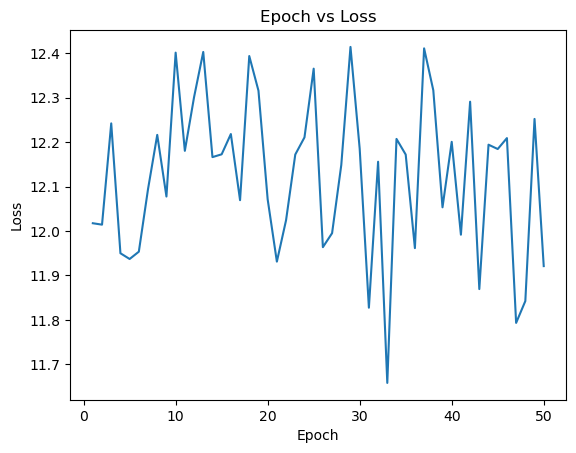

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, log_loss

# Assuming 'data' is your DataFrame

# Convert all elements in the DataFrame to numeric
#data = data.apply(pd.to_numeric)

# Split the dataset into features (X) and the target variable (y)
X = data.drop(columns=['PotentialFraud'])  # Features
y = data['PotentialFraud']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the SGDClassifier with SGD as optimizer
model = SGDClassifier(loss='log', max_iter=50, random_state=42)

# Lists to store epoch and loss values
epochs = []
losses = []

# Train the model and track loss over epochs
for epoch in range(1, 51):
    model.partial_fit(X_train, y_train, classes=np.unique(y))
    y_pred = model.predict_proba(X_train)[:, 1]  # Predict probabilities for positive class
    loss = log_loss(y_train, y_pred)
    epochs.append(epoch)
    losses.append(loss)
    print(f"Epoch {epoch}, Loss: {loss}")

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Plot epoch vs loss graph
plt.plot(epochs, losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Epoch vs Loss')
plt.show()


# SGD

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


Epoch 1, Loss: 12.017437842082591
Epoch 2, Loss: 12.014243515663173
Epoch 3, Loss: 12.241994142372247
Epoch 4, Loss: 11.949948452211373
Epoch 5, Loss: 11.937034602185427
Epoch 6, Loss: 11.953460183908836
Epoch 7, Loss: 12.094346250915063
Epoch 8, Loss: 12.216099499261958
Epoch 9, Loss: 12.077503668440846
Epoch 10, Loss: 12.401083224525216
Epoch 11, Loss: 12.180268052690696
Epoch 12, Loss: 12.30081424760765
Epoch 13, Loss: 12.402606892419803
Epoch 14, Loss: 12.16614101502375
Epoch 15, Loss: 12.172435626658212
Epoch 16, Loss: 12.21802225329916
Epoch 17, Loss: 12.069284166961367
Epoch 18, Loss: 12.393403597834922
Epoch 19, Loss: 12.315536619732956
Epoch 20, Loss: 12.071226373662006
Epoch 21, Loss: 11.931070032425657
Epoch 22, Loss: 12.024395462733462
Epoch 23, Loss: 12.171940599258162
Epoch 24, Loss: 12.2104973912858
Epoch 25, Loss: 12.365043050900796
Epoch 26, Loss: 11.963617456881137
Epoch 27, Loss: 11.995107785197417
Epoch 28, Loss: 12.148440779596532
Epoch 29, Loss: 12.413927352837371

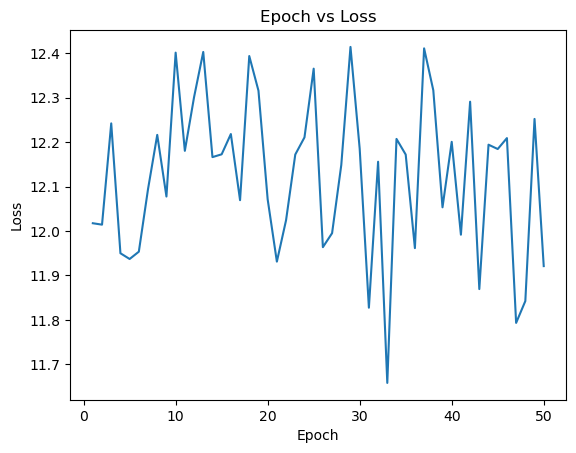

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, log_loss

# Assuming 'data' is your DataFrame

# Convert all elements in the DataFrame to numeric
data = data.apply(pd.to_numeric)

# Split the dataset into features (X) and the target variable (y)
X = data.drop(columns=['PotentialFraud'])  # Features
y = data['PotentialFraud']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the SGDClassifier with SGD as optimizer
sgdmodel = SGDClassifier(loss='log', max_iter=50, random_state=42)

# Lists to store epoch and loss values
epochs = []
losses = []

# Train the model and track loss over epochs
for epoch in range(1, 51):
    sgdmodel.partial_fit(X_train, y_train, classes=np.unique(y))
    y_pred = sgdmodel.predict_proba(X_train)[:, 1]  # Predict probabilities for positive class
    loss = log_loss(y_train, y_pred)
    epochs.append(epoch)
    losses.append(loss)
    print(f"Epoch {epoch}, Loss: {loss}")

# Make predictions on the testing data
y_pred = sgdmodel.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Plot epoch vs loss graph
plt.plot(epochs, losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Epoch vs Loss')
plt.show()


## Logestic regression

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Epoch 1, Loss: 0.5708987567574115


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Epoch 2, Loss: 0.5708987567574115


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Epoch 3, Loss: 0.5708987567574115


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Epoch 4, Loss: 0.5708987567574115


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Epoch 5, Loss: 0.5708987567574115


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Epoch 6, Loss: 0.5708987567574115


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Epoch 7, Loss: 0.5708987567574115


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Epoch 8, Loss: 0.5708987567574115


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Epoch 9, Loss: 0.5708987567574115


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Epoch 10, Loss: 0.5708987567574115


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Epoch 11, Loss: 0.5708987567574115


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Epoch 12, Loss: 0.5708987567574115


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Epoch 13, Loss: 0.5708987567574115


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Epoch 14, Loss: 0.5708987567574115


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Epoch 15, Loss: 0.5708987567574115


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Epoch 16, Loss: 0.5708987567574115


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Epoch 17, Loss: 0.5708987567574115


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Epoch 18, Loss: 0.5708987567574115


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Epoch 19, Loss: 0.5708987567574115


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Epoch 20, Loss: 0.5708987567574115


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Epoch 21, Loss: 0.5708987567574115


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Epoch 22, Loss: 0.5708987567574115


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Epoch 23, Loss: 0.5708987567574115


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Epoch 24, Loss: 0.5708987567574115


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Epoch 25, Loss: 0.5708987567574115


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Epoch 26, Loss: 0.5708987567574115


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Epoch 27, Loss: 0.5708987567574115


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Epoch 28, Loss: 0.5708987567574115


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Epoch 29, Loss: 0.5708987567574115


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Epoch 30, Loss: 0.5708987567574115


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Epoch 31, Loss: 0.5708987567574115


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Epoch 32, Loss: 0.5708987567574115


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Epoch 33, Loss: 0.5708987567574115


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Epoch 34, Loss: 0.5708987567574115


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Epoch 35, Loss: 0.5708987567574115


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Epoch 36, Loss: 0.5708987567574115


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Epoch 37, Loss: 0.5708987567574115


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Epoch 38, Loss: 0.5708987567574115


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Epoch 39, Loss: 0.5708987567574115


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Epoch 40, Loss: 0.5708987567574115


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Epoch 41, Loss: 0.5708987567574115


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Epoch 42, Loss: 0.5708987567574115


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Epoch 43, Loss: 0.5708987567574115


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Epoch 44, Loss: 0.5708987567574115


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Epoch 45, Loss: 0.5708987567574115


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Epoch 46, Loss: 0.5708987567574115


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Epoch 47, Loss: 0.5708987567574115


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Epoch 48, Loss: 0.5708987567574115


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Epoch 49, Loss: 0.5708987567574115


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Epoch 50, Loss: 0.5708987567574115
Accuracy: 0.7041193805254248


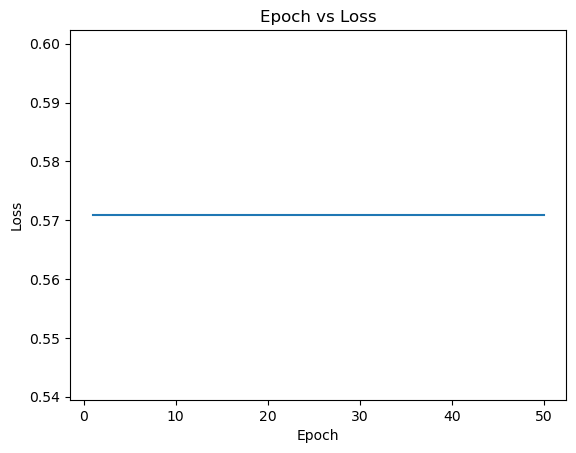

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss

# Assuming 'data' is your DataFrame

# Convert all elements in the DataFrame to numeric
data = data.apply(pd.to_numeric)

# Split the dataset into features (X) and the target variable (y)
X = data.drop(columns=['PotentialFraud'])  # Features
y = data['PotentialFraud']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression model with SGD optimization
model = LogisticRegression(solver='sag', max_iter=50, random_state=42)

# Lists to store epoch and loss values
epochs = []
losses = []

# Train the model and track loss over epochs
for epoch in range(1, 51):
    model.fit(X_train, y_train)
    y_pred = model.predict_proba(X_train)[:, 1]  # Predict probabilities for positive class
    loss = log_loss(y_train, y_pred)
    epochs.append(epoch)
    losses.append(loss)
    print(f"Epoch {epoch}, Loss: {loss}")

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Plot epoch vs loss graph
plt.plot(epochs, losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Epoch vs Loss')
plt.show()


In [84]:
pip install joblib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [85]:
from joblib import dump

In [88]:
# Save the trained model
dump(sgdmodel, 'sgd_model.joblib')
dump(model, 'logreg_model.joblib')

['logreg_model.joblib']

In [104]:
data

,InscClaimAmtReimbursed,DeductibleAmtPaid,Gender,Race,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,...,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud,Provider_ID,AttendingPhysician_ID,OperatingPhysician_ID,OtherPhysician_ID,YearOfBirth,YearOfDeath
0,30,0.0,2,1,39,280,12,12,2,2,...,0,30,50,1,1,1.0,0.0,0.0,1936,0.0
1,40,0.0,1,1,39,270,12,12,1,1,...,0,1810,760,1,1,2.0,0.0,0.0,1922,0.0
2,200,0.0,1,1,39,270,12,12,1,1,...,0,1810,760,1,1,3.0,0.0,0.0,1922,0.0
3,20,0.0,1,1,39,270,12,12,1,1,...,0,1810,760,1,1,4.0,0.0,0.0,1922,0.0
4,40,0.0,1,1,39,270,12,12,1,1,...,0,1810,760,1,1,5.0,0.0,0.0,1922,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558206,0,1068.0,2,2,19,350,12,12,2,1,...,2136,30,100,0,5406,15298.0,32972.0,0.0,1942,2009.0
558207,4000,1068.0,1,1,5,200,12,12,1,2,...,1068,0,0,0,5407,75927.0,0.0,0.0,1943,0.0
558208,8000,1068.0,1,1,14,680,12,12,2,1,...,1068,0,0,0,5408,82061.0,0.0,0.0,1937,0.0
558209,5000,1068.0,2,1,3,60,12,0,1,1,...,1068,0,0,0,5409,82062.0,0.0,0.0,1927,0.0


In [105]:
data.iloc[558206]

InscClaimAmtReimbursed                 0.0
DeductibleAmtPaid                   1068.0
Gender                                 2.0
Race                                   2.0
State                                 19.0
County                               350.0
NoOfMonths_PartACov                   12.0
NoOfMonths_PartBCov                   12.0
ChronicCond_Alzheimer                  2.0
ChronicCond_Heartfailure               1.0
ChronicCond_KidneyDisease              1.0
ChronicCond_Cancer                     2.0
ChronicCond_ObstrPulmonary             1.0
ChronicCond_Depression                 2.0
ChronicCond_Diabetes                   1.0
ChronicCond_IschemicHeart              1.0
ChronicCond_Osteoporasis               2.0
ChronicCond_rheumatoidarthritis        1.0
ChronicCond_stroke                     2.0
IPAnnualReimbursementAmt            2200.0
IPAnnualDeductibleAmt               2136.0
OPAnnualReimbursementAmt              30.0
OPAnnualDeductibleAmt                100.0
PotentialFr